# Emotion Classification Using Ensemble Methods: AdaBoost and Gradient Boosting Classifiers

In this Colab notebook, we explore the application of **ensemble learning techniques** for emotion classification using a balanced, augmented dataset. Ensemble methods like **AdaBoost** and **Gradient Boosting** leverage the strengths of multiple weak learners to create a robust classifier capable of handling complex tasks.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into **training** (80%) and **testing** (20%) subsets to train and evaluate the models.

2. **TF-IDF Vectorization:**
   - Text data is converted into numerical feature vectors using **TF-IDF Vectorizer**, ensuring that the importance of terms is effectively captured for machine learning.

3. **Ensemble Models:**
   - **AdaBoost Classifier**:
     - Builds a strong classifier by combining multiple weak learners (e.g., decision stumps) iteratively.
   - **Gradient Boosting Classifier**:
     - Sequentially builds models to correct errors made by previous models, improving accuracy progressively.

4. **Performance Evaluation:**
   - Models are evaluated on:
     - **Accuracy**: Overall classification accuracy on the test set.
     - **Classification Report**: Detailed performance metrics such as precision, recall, and F1-score for each emotion.
   - **Confusion Matrix**: Provides insights into the model's predictions for each emotion.




# Step 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the combined dataset

In [ ]:
# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split the Data into Train and Test Sets

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Text Vectorization using TF-IDF

In [ ]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Train and Evaluate Ensemble Classifiers using the augmented balanced dataset

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- AdaBoost Classifier Performance ---
Accuracy: 0.2687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       anger       0.69      0.36      0.47      4273
     boredom       0.75      0.67      0.70      3259
   confusion       0.58      0.05      0.10      4222
     disgust       0.83      0.06      0.12      4525
        fear       0.24      0.00      0.00      4332
       guilt       0.91      0.07      0.13      4553
         joy       0.14      0.92      0.25      5621
     neutral       0.74      0.22      0.33      4043
     sadness       0.00      0.00      0.00      4807
       shame       0.92      0.09      0.17      4291
    surprise       0.54      0.52      0.53      3376

    accuracy                           0.27     47302
   macro avg       0.58      0.27      0.25     47302
weighted avg       0.56      0.27      0.23     47302



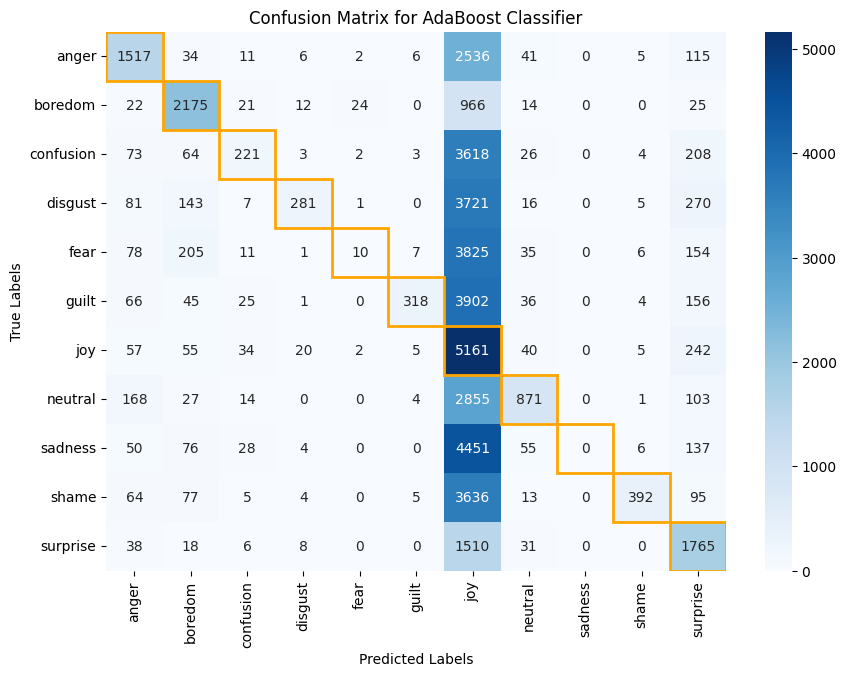


--- Gradient Boosting Classifier Performance ---
Accuracy: 0.4476
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.45      0.53      4273
     boredom       0.80      0.76      0.78      3259
   confusion       0.46      0.38      0.42      4222
     disgust       0.49      0.38      0.43      4525
        fear       0.46      0.30      0.36      4332
       guilt       0.53      0.28      0.37      4553
         joy       0.24      0.65      0.35      5621
     neutral       0.59      0.48      0.53      4043
     sadness       0.43      0.34      0.38      4807
       shame       0.52      0.33      0.40      4291
    surprise       0.61      0.66      0.64      3376

    accuracy                           0.45     47302
   macro avg       0.52      0.46      0.47     47302
weighted avg       0.51      0.45      0.45     47302



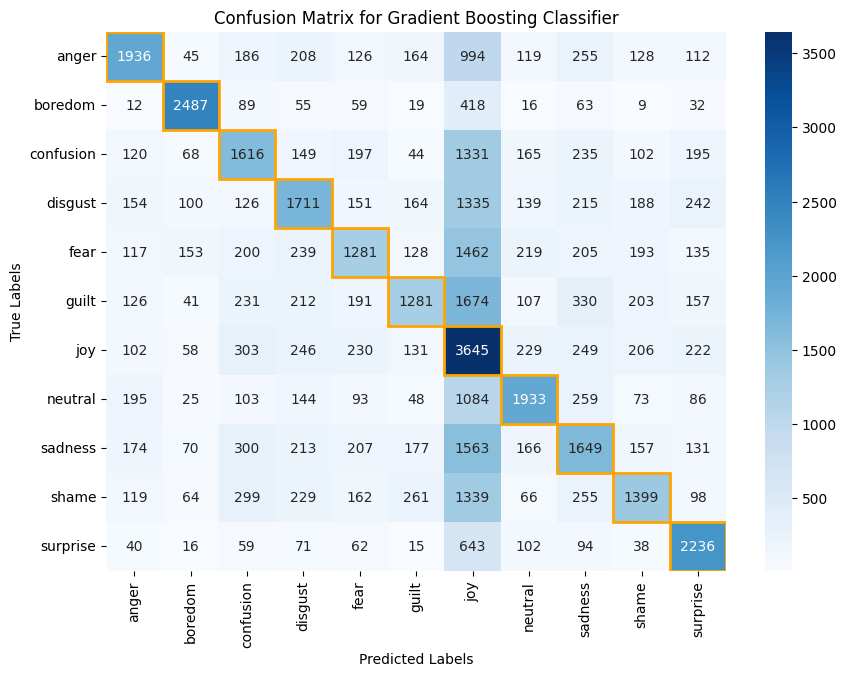

In [ ]:
# Define ensemble models
# Purpose: Specify the ensemble classifiers to be evaluated.
models = {
    "AdaBoost Classifier": AdaBoostClassifier(
        n_estimators=50,   # Number of weak learners
        random_state=42    # Set a random state for reproducibility
    ),
    "Gradient Boosting Classifier": GradientBoostingClassifier(
        n_estimators=100,  # Number of boosting stages
        random_state=42    # Set a random state for reproducibility
    ),
}

# Dictionary to store accuracy results
accuracy_results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Highlight the diagonal with a different color
    for i in range(len(cm)):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='orange', lw=2))

    plt.show()

# Train, evaluate and plot results for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

    # Print classification report
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name, labels=np.unique(y))

# Step 6: Plot Accuracy Results for Each Ensemble Classifier

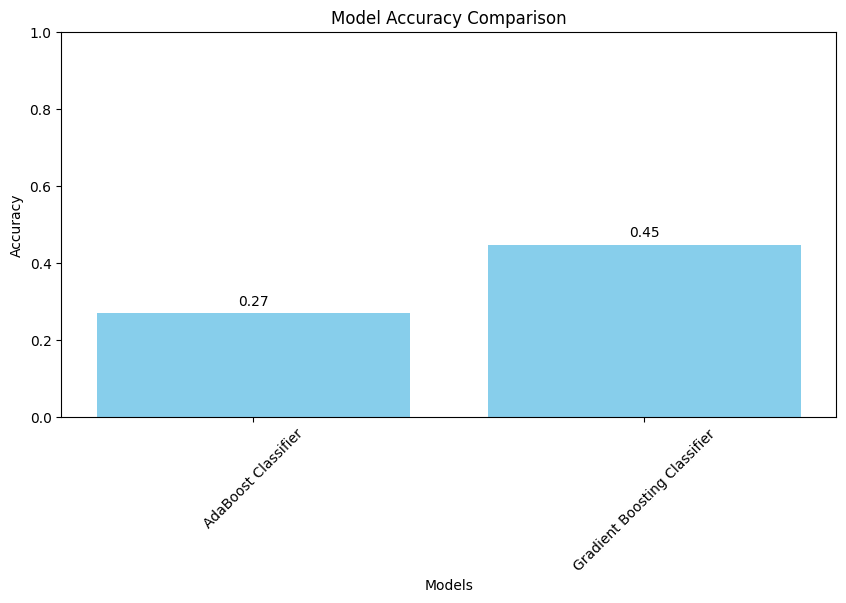

In [ ]:
# Plot model accuracy comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center')

plt.show()